# Learning a CStree

In [9]:
import numpy as np
import networkx as nx

import cstrees.cstree as ct
import cstrees.stage as st
import cstrees.learning as ctl
import cstrees.scoring as sc

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create a CStree

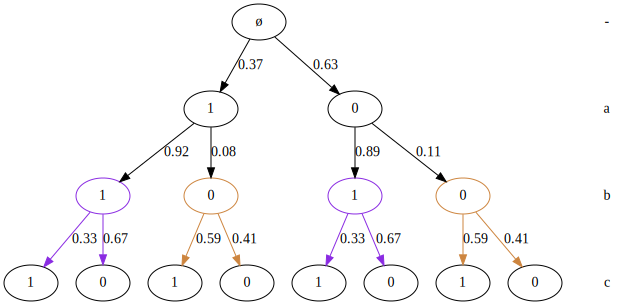

In [10]:
np.random.seed(5)
tree = ct.CStree([2] * 3, labels=["a", "b", "c"])

tree.update_stages(
    {
        0: [{"context": {0:0}}, {"context": {0:1}}],
        1: [{"context": {1:0}}, {"context": {1:1}}]
    }
)

tree.sample_stage_parameters(alpha=1.0)
tree.plot(full=True)

Number of DAGs: 1
Context: None


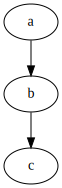

In [11]:
true_adags = tree.to_minimal_context_agraphs()
print("Number of DAGs:", len(true_adags))
print("Context:", list(true_adags.keys())[0])
list(true_adags.values())[0]

## Draw samples

In [12]:
df = tree.sample(10000)

## Calculate score tables

In [13]:
score_table, context_scores, _ = sc.order_score_tables(
    df, max_cvars=2, poss_cvars=None, alpha_tot=1.0, method="BDeu"
)

Order score tables: 100%|██████████| 3/3 [00:00<00:00, 2697.88it/s]


## Find the optimal order by exhaustive search

In [14]:
optord, score = ctl._find_optimal_order(score_table)
print("optimal order: {}, score {}".format(optord, score))

optimal order: ['b', 'c', 'a'], score -16332.559328979401


## Find the optimal CStree (staging of each level) of the best order

In [15]:
opttree = ctl._optimal_cstree_given_order(optord, context_scores)

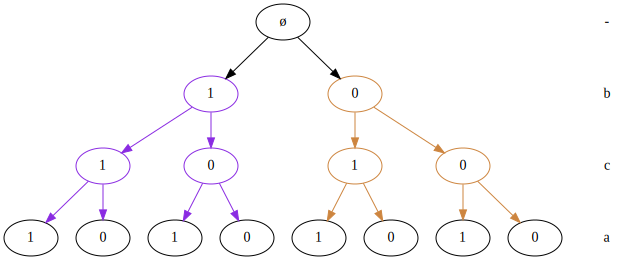

In [16]:
opttree.plot(full=True)

## Estimate the parameters

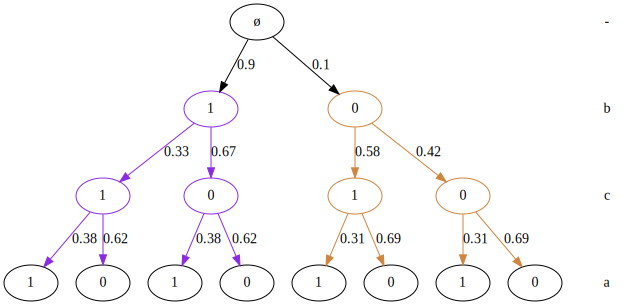

In [17]:
opttree.estimate_stage_parameters(df, alpha_tot=1.0, method="BDeu")
opttree.plot(full=True)

## Plot the minimal context DAGs

Number of DAGs: 1
Context: None


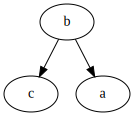

In [18]:
opt_adags = opttree.to_minimal_context_agraphs()
print("Number of DAGs:", len(opt_adags))
print("Context:", list(opt_adags.keys())[0])
list(opt_adags.values())[0]